In [1]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#loading the dataset 
df = pd.read_csv("Dataset.csv")
df.info()
df.head()                                             #printing the first five rows of the dataset
df.tail()                                             #printing the last five rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


LEVEL-3

TASK-1 : Predictive Modeling

In [3]:
df.dropna(subset=["Aggregate rating"], inplace=True)  # Target variable must be clean

In [4]:
# Encode categorical features if necessary
df["Has Table booking"] = df["Has Table booking"].map({"Yes": 1, "No": 0})
df["Has Online delivery"] = df["Has Online delivery"].map({"Yes": 1, "No": 0})
#Drop columns that are not useful
df_model = df[["Votes", "Price range", "Has Table booking", "Has Online delivery", "Aggregate rating"]]

In [5]:
#Encode Rating color using LabelEncoder
le = LabelEncoder()
df["Rating color"] = le.fit_transform(df["Rating color"])

In [6]:
df_model = df[[
    "Votes",
    "Price range",
    "Average Cost for two",
    "Country Code",
    "Has Table booking",
    "Has Online delivery",
    "Rating color",
    "Aggregate rating"
]]
# Handle missing values: fill numeric columns with their mean
df_model = df_model.fillna(0)

In [8]:
# Define input features (X) and target variable (y)
X = df_model.drop("Aggregate rating", axis=1)   
X = X.fillna(X.mean())                          
y = df_model["Aggregate rating"]     

In [9]:
#Spliting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Model training 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
#Model prediction
y_pred = lr_model.predict(X_test)

In [12]:
#Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.4623613658600096
R² Score: 0.35751698530869924


TASK-2 : Customer Preference Analysis

In [13]:
#Relationship Between Cuisine and Rating
avg_rating_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(avg_rating_cuisine.head())

Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Name: Aggregate rating, dtype: float64


In [14]:
#most popular cuisines among customers based on the number of votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print(popular_cuisines.head())

Cuisines
North Indian, Mughlai    53747
North Indian             46241
North Indian, Chinese    42012
Cafe                     30657
Chinese                  21925
Name: Votes, dtype: int64


In [15]:
#Identifying Cuisines with High Ratings & Popularity
cuisine_analysis = pd.DataFrame({
    'Total Votes': df.groupby('Cuisines')['Votes'].sum(),
    'Average rating': df.groupby('Cuisines')['Aggregate rating'].mean()
}).sort_values(by='Average rating', ascending=False)

print(cuisine_analysis.head())

                                 Total Votes  Average rating
Cuisines                                                    
Burger, Bar Food, Steak                 2238             4.9
American, Burger, Grill                  162             4.9
American, Caribbean, Seafood             548             4.9
American, Coffee and Tea                 570             4.9
Mexican, American, Healthy Food          223             4.9


TASK-3 : Data Visualization

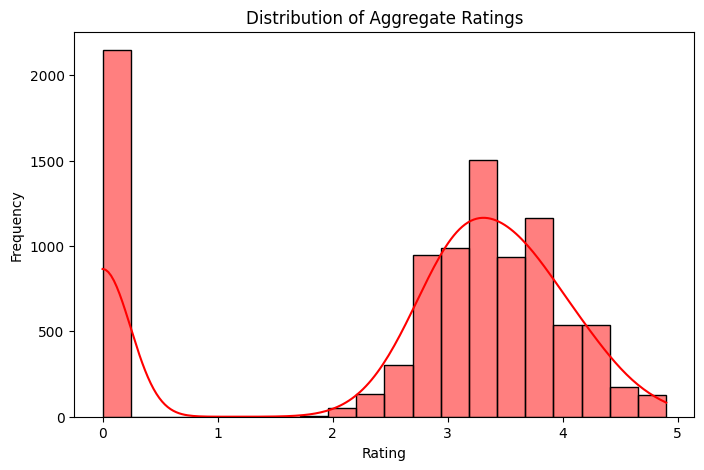

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True,color="red")
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

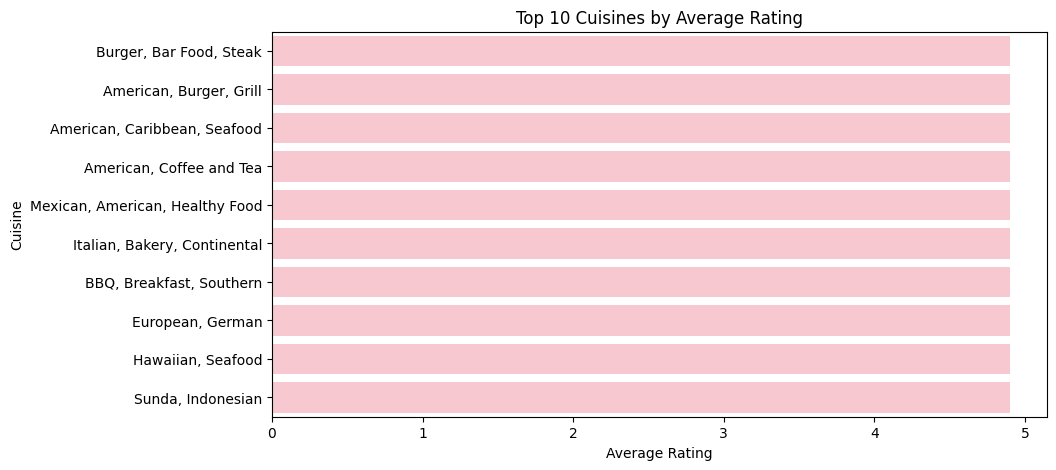

In [17]:
#Comparing Average ratings by Cuisines or City
avg_rating_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index,color="pink")
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

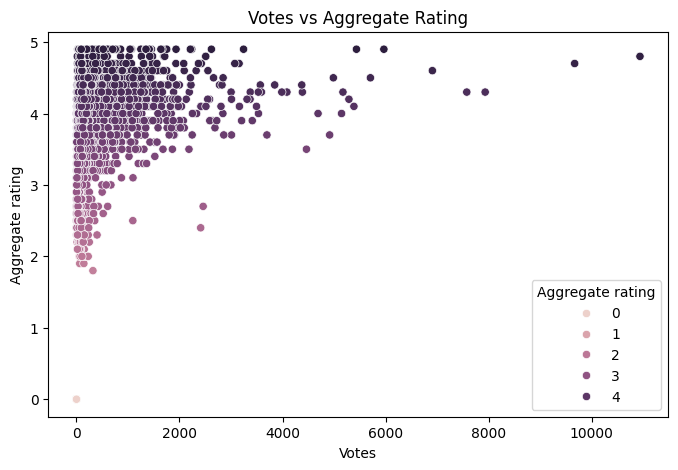

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating',hue="Aggregate rating")
plt.title('Votes vs Aggregate Rating')
plt.show()

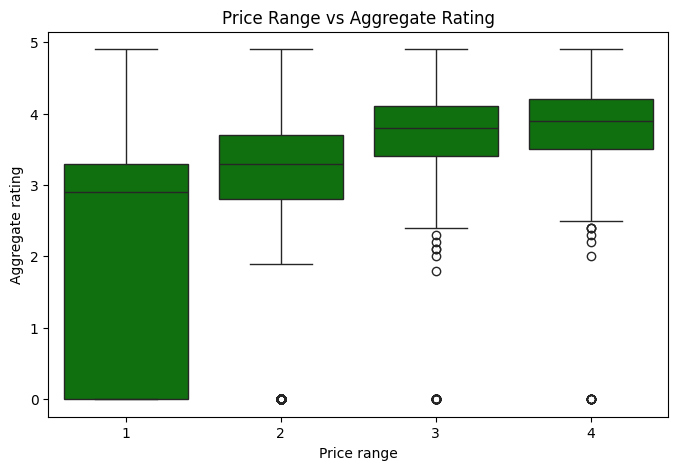

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Price range', y='Aggregate rating',color="green")
plt.title('Price Range vs Aggregate Rating')
plt.show()

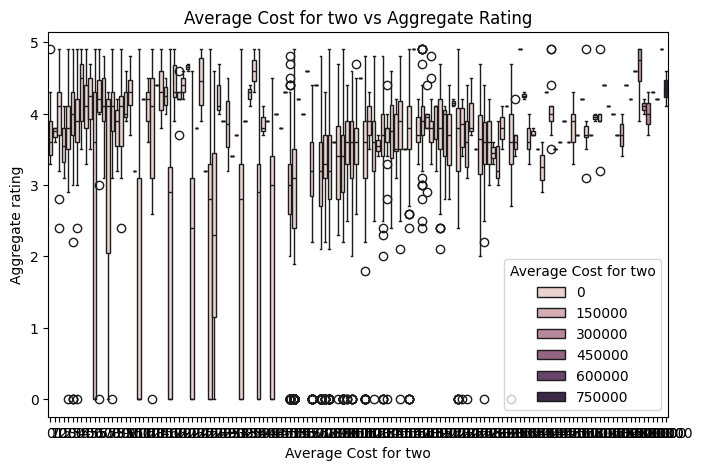

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Average Cost for two', y='Aggregate rating', hue='Average Cost for two')
plt.title('Average Cost for two vs Aggregate Rating')
plt.show()

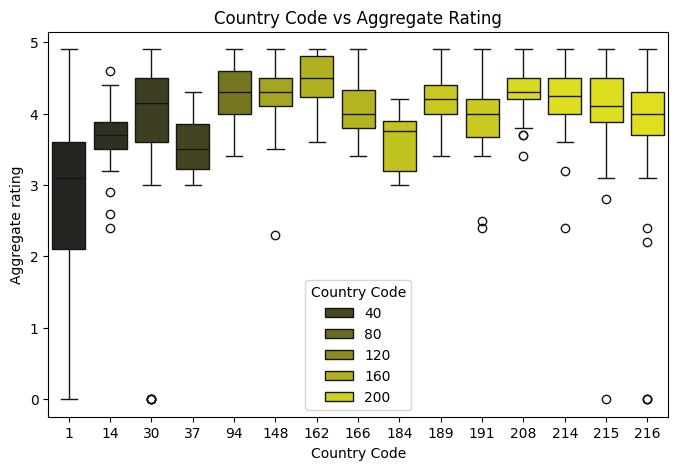

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Country Code', y='Aggregate rating',hue="Country Code",palette='dark:yellow')
plt.title('Country Code vs Aggregate Rating')
plt.show()